# Text Classification

The goal for this week's assignment is to train a machine learning classifier on the categories in our train set, and then evaluate the model on the test set. We will be using the 20 Newsgroups dataset in 'sklearn.datasets' to practice text classification. In other words, we will classify the forum posts from the datasets into the forums they belong to (e.g. sports, autos, etc.). The 20 Newsgroups dataset contains 18,846 newsgroups posts on 20 topics which have been split into a training set and a testing set (scikit-dataset).

## Load 20 newsgroups dataset from sklearn

First, we need to obtain the 20 Newsgroups dataset from 'sklearn.datasets'.

In [1]:
from sklearn.datasets import fetch_20newsgroups

The module above loads a list of the raw texts (Dataset loading ultilities, n.d.). Now that we have access to the raw text, we can remove 'headers', 'footers', and 'quotes' from our dataset using the argument 'remove'. Leaving the 'headers', 'footers', and 'quotes' in the dataset makes it easy to "guess" the categories. 'Headers' refer to the the newsgroup headers, 'footers' refer to the blocks at the end of posts that look like signatures, and 'quotes' refer to the the lines that appear to be quoting other posts (Dataset loading ultilities, n.d.). We can then subset the 20 newsgroups data set by adding the argument subset = 'train' or 'test'. 

In [2]:
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

The data for the 20 newsgroups dataset is now stored in two different subsets in a key-value dictionary like object: a training set and a testing set (Dataset loading ultilities, n.d.).

### View Training Dataset (newsgroups_train)

In [3]:
newsgroups_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

The keys of the our dataset (Dataset loading ultilities, n.d.):

1. data: newsgroups documents stored in a list.
2. filenames: path to the location of the data stored in a list.
3. target_names: names of the target classes stored in a list.
4. target: target labels stored in an array.
5. DESCR: full description of the dataset stored as a string.

 We can view these keys by using the function .data/filenames/target_names/target/DESCR function. 

In [4]:
newsgroups_train.filenames #view filenames

array(['C:\\Users\\07hoc\\scikit_learn_data\\20news_home\\20news-bydate-train\\rec.autos\\102994',
       'C:\\Users\\07hoc\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.sys.mac.hardware\\51861',
       'C:\\Users\\07hoc\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.sys.mac.hardware\\51879',
       ...,
       'C:\\Users\\07hoc\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.sys.ibm.pc.hardware\\60695',
       'C:\\Users\\07hoc\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.graphics\\38319',
       'C:\\Users\\07hoc\\scikit_learn_data\\20news_home\\20news-bydate-train\\rec.motorcycles\\104440'],
      dtype='<U95')

In [6]:
len(newsgroups_train.target_names), newsgroups_train.target_names
#count total target names and view target names

(20,
 ['alt.atheism',
  'comp.graphics',
  'comp.os.ms-windows.misc',
  'comp.sys.ibm.pc.hardware',
  'comp.sys.mac.hardware',
  'comp.windows.x',
  'misc.forsale',
  'rec.autos',
  'rec.motorcycles',
  'rec.sport.baseball',
  'rec.sport.hockey',
  'sci.crypt',
  'sci.electronics',
  'sci.med',
  'sci.space',
  'soc.religion.christian',
  'talk.politics.guns',
  'talk.politics.mideast',
  'talk.politics.misc',
  'talk.religion.misc'])

In [7]:
newsgroups_train.target #view target labels

array([7, 4, 4, ..., 3, 1, 8])

The target key corresponds to a newsgroup but, as we can see above, is an integer. We can also see duplicate labels. To find the distinct values for the integers (labels), we can use the .unique() function in the NumPy module.  

In [9]:
import numpy as np
np.unique(newsgroups_train.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

Further, we can get the frequency counts of each of the unique values in our NumPy array by using the return_counts argument in our unique() function (Varun, n.d.). 

In [13]:
values, counts = np.unique(newsgroups_train.target, return_counts=True)
print('The target labels are:', values, '\n')
print('The counts for the target labels are:', counts)

The target labels are: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] 

The counts for the target labels are: [480 584 591 590 578 593 585 594 598 597 600 595 591 594 593 599 546 564
 465 377]


Similar to the number of target classes, we see that there are 20 target labels.

We can plot the counts for each label using matplotlib. We use the plt.xticks() function to rotate the labels on the x-axis. (Rotate axis text in python matplotlib, n.d.).

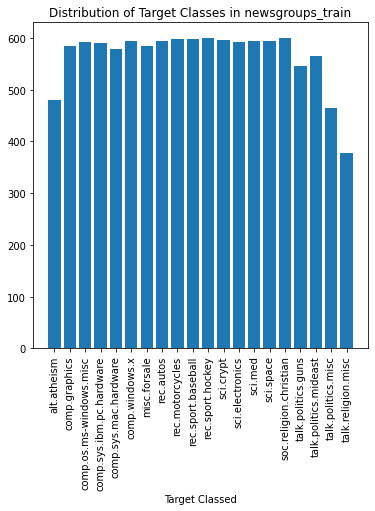

In [15]:
import matplotlib.pyplot as plt
plot = plt.figure(figsize=(6,6))

plt.bar(newsgroups_train.target_names, counts)
plt.xticks(rotation=90)
plt.xlabel('Target Classed')
plt.ylabel = ('Frequency Counts')
plt.title('Distribution of Target Classes in newsgroups_train')

plt.show()

#sometime cell needs to be run twice

Now, the .data parameter alone could possibly crash our computer because of the amount of data contained in this key. In lieu of this, we can view each document in the 'data' key separately. If we want to look at the first document in our newsgroups_train dataset, we can execute the following command:

In [16]:
newsgroups_train['data'][0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

After reading the first document, we can assume that this post is about cars. Specifically, we 2-door sports car called a Bricklin. We can make this assumption based the presence of key words like 'car', 'engine', and 'bumper'. 

To determine how many documents are in our training set, we can use the len() function.  

In [17]:
len(newsgroups_train['data'])

11314

To determine the label associated with the first document, we can use the following command: 

In [18]:
newsgroups_train['target'][0]

7

Using the integer above, we can determine which target name this label belongs to.

In [19]:
newsgroups_train['target_names'][7]

'rec.autos'

We can see that the first document in our newsgroups_train dataset belongs to the target class 'rec.autos', which we had assumed above.

### View Testing Dataset (newsgroups_test)

We can use the same commands on our test set as we did on the training set. To get the keys of our test dataset, we can use the .keys() function

In [20]:
newsgroups_test.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [21]:
newsgroups_test.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

We can see that keys and the target classes for the testing set are the same as the ones in our training set. To view the first document in our training set, we can use similar commands as above. 

In [22]:
newsgroups_test['data'][0] #first article from 'data'

'I am a little confused on all of the models of the 88-89 bonnevilles.\nI have heard of the LE SE LSE SSE SSEI. Could someone tell me the\ndifferences are far as features or performance. I am also curious to\nknow what the book value is for prefereably the 89 model. And how much\nless than book value can you usually get them for. In other words how\nmuch are they in demand this time of year. I have heard that the mid-spring\nearly summer is the best time to buy.'

Reading the article above, we can assume that the post is discussing cars. In particular, the the author of the post is wanting to know the book value of the '89 Bonneville model.

In [23]:
newsgroups_test['target'][0] #get the labels from the 'target' attribute

7

In [24]:
#to get the 7th 'target'
newsgroups_test['target_names'][7]

'rec.autos'

The first document in our testing set also belongs to the 'rec.auto' class. 

Notice, that the number of documents in our train data and testing data are different. The training set contains 11,314 documents, while the testing set contains 7,532 documents. 

In [25]:
len(newsgroups_test['data'])

7532

## Visualization for Number of Articles in each Category for Full 20 Newsgroups Dataset

We can determine the number of documents/articles that belong to each category/target class by loading the full 20 Newsgroups Dataset.

In [26]:
newsgroups_full = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

This allows us to avoid having to loop through the training and testing set separately.

Note: One way to confirm that we subset the train and test sets correctly is to compare the number of documents in the full dataset and the number of documents of the train and test set combined. 

In [27]:
print('Number of Documents in Full Dataset:', len(newsgroups_full['data']))
print('Number of Documents in Train Set + Test Set:', len(newsgroups_train['data']) + len(newsgroups_test['data']))

Number of Documents in Full Dataset: 18846
Number of Documents in Train Set + Test Set: 18846


Now, in order to determine the number of articles that are in each of our target classes, we first need to loop through the 'data' key in our newsgroups_full dataset. Recall, the 'data' key contains the documents of the dataset and each document is associated with an index number (first document has an index of [0]). Then, to determine the target class, we had to get the target label and then we could determine the target class. 

To loop through the 'data' key, we can use the built-in enumerate() function, which returns a tuple containing a count/index (which starts at 0) and the values for each count (Built-in Functions, n.d.). This method allows us to obtain the index and the document. Then, we can use the index to get the target label. Using the target label, and then we can get the target name associated with each document. Finally, we can add each target name to a list.

In [28]:
target_list = []

for i, v in enumerate(newsgroups_full['data']): #loop through index and values in 'data'
    target_label = newsgroups_full['target'][i] #get label of data article
    target_name = newsgroups_full['target_names'][target_label] #get the target name from label
    target_list.append(target_name) #append to list

Now that we have a list that contains every target name in our newsgroups_full dataset, we can count the occurrences of each target name. One method to do this is to loop through our list that contains all the target names (target_list), and then we can use the built-in .count() function to count frequency of each target name. We then store this information in a dictionary, which stores our data as a key (target name)- value (target name count) pair. 

In [29]:
freq_dict = {}

for x in target_list: #loop through list elements
    freq_dict[x] = target_list.count(x) #append element and the count to dictionary

Our dictionary now contains each target name and the frequency of each.

In [30]:
freq_dict

{'rec.sport.hockey': 999,
 'comp.sys.ibm.pc.hardware': 982,
 'talk.politics.mideast': 940,
 'comp.sys.mac.hardware': 963,
 'sci.electronics': 984,
 'talk.religion.misc': 628,
 'sci.crypt': 991,
 'sci.med': 990,
 'alt.atheism': 799,
 'rec.motorcycles': 996,
 'rec.autos': 990,
 'comp.windows.x': 988,
 'comp.graphics': 973,
 'sci.space': 987,
 'talk.politics.guns': 910,
 'misc.forsale': 975,
 'rec.sport.baseball': 994,
 'talk.politics.misc': 775,
 'comp.os.ms-windows.misc': 985,
 'soc.religion.christian': 997}

To confirm our dictionary is complete, we can compare the number of documents in our newsgroups_full dataset, the number of elements in our target_list, and the sum of our freq_dict values. 

In [26]:
len(newsgroups_full['data']), len(target_list), sum(freq_dict.values())

(18846, 18846, 18846)

We can plot these frequencies using a matplotlib plot. First, we will sort our dictionary (freq_dict) in descending order to we can easily identify the most and least occurring target name. This can be done by using the 'itemgetter' argument in the operator module.

In [31]:
from operator import itemgetter
sorted_freq_dict = dict(sorted(freq_dict.items(), key=itemgetter(1)))
sorted_freq_dict

{'talk.religion.misc': 628,
 'talk.politics.misc': 775,
 'alt.atheism': 799,
 'talk.politics.guns': 910,
 'talk.politics.mideast': 940,
 'comp.sys.mac.hardware': 963,
 'comp.graphics': 973,
 'misc.forsale': 975,
 'comp.sys.ibm.pc.hardware': 982,
 'sci.electronics': 984,
 'comp.os.ms-windows.misc': 985,
 'sci.space': 987,
 'comp.windows.x': 988,
 'sci.med': 990,
 'rec.autos': 990,
 'sci.crypt': 991,
 'rec.sport.baseball': 994,
 'rec.motorcycles': 996,
 'soc.religion.christian': 997,
 'rec.sport.hockey': 999}

Now, we can use our sorted dictionary in our matplotlib plot. Note, that the x-axis labels were rotated 90 degrees to aid in readability (Rotate axis text in python matplotlib, n.d.). 

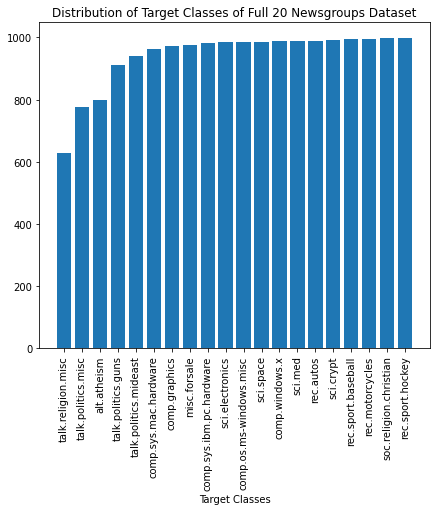

In [32]:
import matplotlib.pyplot as plt
plot = plt.figure(figsize=(7,6))

plt.bar(sorted_freq_dict.keys(), sorted_freq_dict.values())
plt.xticks(rotation=90)
plt.xlabel('Target Classes')
plt.ylabel = ('Frequency Counts')
plt.title('Distribution of Target Classes of Full 20 Newsgroups Dataset')

plt.show()

We can easily see that the least occurring target name is talk.religion.misc and the most occurring target name is rec.sport.hockey. 

## WordCloud for Words in rec.sport.hockey Target Class

Now that we have determined that the highest occurring target name is rec.sport.hockey, we can determine the highest occurring words in the documents with the rec.sports.hockey label. We can do this by creating a WordCloud. Recall, a WordCloud is a technique used to visualize text data where the size of each word represents the frequency of the word (Kadam, 2019).

To get the documents with this label, we will use a loop and the same enumerate() function that we did above. We will still need to get the target labels and the target names, but this time we will append to a list where the target name is 'rec.sport.hockey'. 

In [33]:
hockey_list = []

for i, v in enumerate(newsgroups_full['data']): #loop through index and values in 'data'
    target_label = newsgroups_full['target'][i] #get label of data article
    target_name = newsgroups_full['target_names'][target_label] #get the target name for label
    if target_name == 'rec.sport.hockey':
        hockey_list.append(v)

To ensure we got all the documents with the label rec.sport.hockey, we can compare the number of documents in our hockey_list with the count in our freq_dict above, which are equal. 

In [34]:
print('There are ' + str(len(hockey_list)) + ' documents in the hockey_list.\n'),
print('The first document is: ' + hockey_list[0]) 

There are 999 documents in the hockey_list.

The first document is: 

I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




Before we create our WordCloud, we need to clean our text. This means we lower case words, remove punctuation, remove stop words, stem/lemmatize words, etc. We can use our text cleaning function from Week 1 to do this. 

In [35]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [36]:
def clean_text(text):
    nlp_text = nlp(text)
    lemmas = []
    for word in nlp_text:
        if word.is_stop: 
            continue 
        if not word.is_alpha: 
            continue
        if word.lemma_ == '-PRON-':
            lemmas.append(word.lower_) 
        else:
            lemmas.append(word.lemma_)
            
    return ' '.join(lemmas)

Now, recall that to be able to use our text cleaning function, we need to convert our list to a string so SpaCy and NLP can process the text.

In [37]:
str_hockey = ' '.join(hockey_list)
len(str_hockey)

1125628

Unfortunately, when trying to apply our clean_text function to our str_hockey (variable storing the string version of our hockey_list), we received an error that the "text of length 1125628 exceeds maximum of 1000000. The v2.x parser and NER models require roughly 1GB of temporary memory per 100,000 characters in the input. This means long texts may cause memory allocation errors. [...]." 

Thus, we will only use the first 500 documents in our hockey_list. 

In [38]:
str_hockey = ' '.join(hockey_list[0:499])
clean_hockey = clean_text(str_hockey)

In [39]:
clean_hockey[0:500]

'sure basher pen fan pretty confused lack kind post recent Pens massacre Devils actually bit puzzled bit relieved go end non pittsburgher relief bit praise Pens man kill Devils bad think Jagr show well regular season stat lot fo fun watch playoff Bowman let JAgr lot fun couple game Pens go beat pulp Jersey disappointed Islanders lose final regular season game pen RULE stuff delete ok solution problem Canada yesterday able watch game NJ PITT ABC LA CAL CBC BUFF BOS TSN FOX MON QUE CBC think series'

For this WordCloud, we will be applying a mask, which means we will display our WordCloud in some sort of shape. We can do this by loading a PNG file into our environment and apply this image to our WordCloud as a mask (Vu, 2019). For this mask, we will using a mask found: http://clipart-library.com/clip-art/field-hockey-player-silhouette-11.htm. 

In [40]:
import numpy as np
from PIL import Image

In [41]:
hockey_mask = np.array(Image.open('C:/Users/07hoc/Downloads/MSDS 682 Downloads/Week 4/hockey.png')) 
hockey_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In order to use mask our WordCloud, the 0's in our array should be 255 (Vu, 2019). This represents the intensity of the pixels for the "white part" of the image. We can transform the format of our mask by using a function or replacing the values in the array.

In [42]:
#(Replace elements of a matrix using numpy in python, 2019))
hockey_mask[hockey_mask <= 0] = 255 
hockey_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

We can now build our masked WordCloud by utilizing the 'mask' argument for WordCloud. 

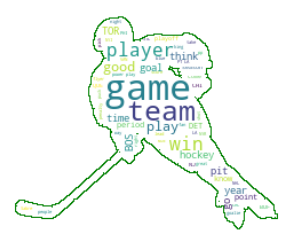

In [43]:
from wordcloud import WordCloud
#generate a word cloud image 

fig_mask = plt.figure(figsize=(5, 5))
wordcloud_mask = WordCloud(width=500, height=500, mask=hockey_mask, background_color ="white", contour_width = 0.5, contour_color='green', max_font_size=40).generate(clean_hockey)

plt.imshow(wordcloud_mask, interpolation='bilinear')
_ = plt.axis("off")

The larger the word, the higher the frequency of the word. Thus, we can see that in the first 500 documents with the rec.sport.hockey label, the top occurring words are:

1. game
2. team
3. player
4. play
5. win

To determine the counts of these words, we can use a word counter. 

## Word Counts for rec.sport.hockey Target Class

One method to count words is to use The FreqDist class in the NLTK library, which is a class used for "frequency distributions". This allows us to count the number of times that each outcome occurs (Nltk package, n.d.). Again, since the string version of our hockey_list is too large, we will use the first 500 documents. Recall, the cleaned version of the 500 documents is stored in the 'clean_hockey' variable. 

In [44]:
clean_hockey[0:100]

'sure basher pen fan pretty confused lack kind post recent Pens massacre Devils actually bit puzzled '

To get the top 20 most common words, we can use the .most_common(20) function in the nltk module. 

In [45]:
from nltk import FreqDist
hockey_fd = FreqDist(clean_hockey.split())
hockey_fd.most_common(20)

[('game', 498),
 ('play', 357),
 ('team', 325),
 ('LA', 239),
 ('period', 239),
 ('player', 219),
 ('good', 191),
 ('goal', 186),
 ('win', 185),
 ('think', 176),
 ('year', 174),
 ('time', 160),
 ('like', 160),
 ('point', 159),
 ('get', 158),
 ('go', 157),
 ('shot', 155),
 ('hockey', 148),
 ('season', 135),
 ('playoff', 129)]

We can see that the word 'game' occurs the most throughout the documents with the rec.sport.hockey label. Suppose we wanted to get the words that occur more than 100 times. We can use list compression or use a loop. A list compression would look like:

In [46]:
hockey_count = [(w, c) for w, c in hockey_fd.items() if c >= 100]
hockey_count[0:10] #limit output

[('go', 157),
 ('think', 176),
 ('season', 135),
 ('playoff', 129),
 ('game', 498),
 ('NJ', 115),
 ('LA', 239),
 ('BOS', 100),
 ('hockey', 148),
 ('time', 160)]

In [47]:
len(hockey_count)

33

We can see that we have 33 words that occur more than 100 times in our rec.sport.hockey documents. We can also use a loop, which would look like: 

In [48]:
#Get words that have more than 50 counts using a loop
counter = 0 #limit output with counter

for word, counts in hockey_fd.items(): #word, counts = key, value
    if counter == 10:
        break
    if counts >= 100:
        print(word, 'shows up', counts, 'times')
        counter = counter + 1

go shows up 157 times
think shows up 176 times
season shows up 135 times
playoff shows up 129 times
game shows up 498 times
NJ shows up 115 times
LA shows up 239 times
BOS shows up 100 times
hockey shows up 148 times
time shows up 160 times


Now, we can plot the word frequencies using matplotlib by putting the hockey_count list (created with the list compression) in a dictionary and plotting the keys (words) and values (counts). 

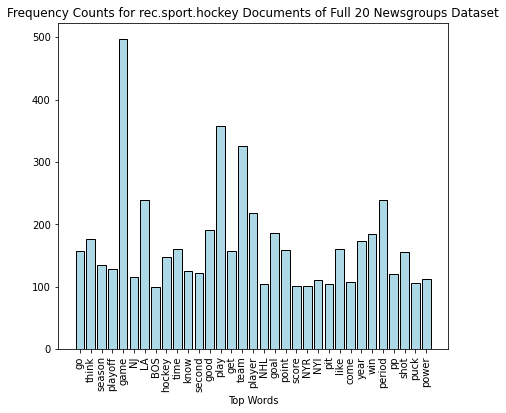

In [49]:
import matplotlib.pyplot as plt
f_plot = plt.figure(figsize=(7,6))

plt.bar(dict(hockey_count).keys(), dict(hockey_count).values(), color=('lightblue'), edgecolor = 'black')
plt.xticks(rotation=90)
plt.xlabel('Top Words')
plt.ylabel = ('Frequency Counts')
plt.title('Frequency Counts for rec.sport.hockey Documents of Full 20 Newsgroups Dataset')

plt.show()

The plot allows us to clearly identify top word. We can easily see that the top occurring word in the first 500 documents labeled as rec.sport.hockey is 'game'. 

## Train a Naive Bayes Classifier

Naive Bayes "is a classification algorithm for binary (two-class) and multiclass classification problems. It is called Naive Bayes because the calculations of the probabilities for each class are simplified to make their calculations tractable (Brownlee, 2019)." Sklearn provides a Naive Bayes classifier for mulinomial models which is suitable for classification with discrete features such as word counts for text classification (Naive_bayes. Multinomialnb, n.d.). 

### Naive Bayes with Split-Sample Data

Before we attempt to train a classifier for our subsetted 20 newsgroups dataset (newsgroups_test, newsgroups_train), we will start with a small sample from our 20 newsgroups dataset. To sample our data, we can use the train_test_split() function in sklearn which splits arrays or matrices into random train and test subsets (Model_selection. Train_test_split, n.d.). We will sample our training dataset so we are only handling 5% of the full data. 

First, we need to get the training data that we will be sampling (newsgroups_train['data']). Then, we can use the train_test_split() function to sample down the data. We need to get a X_train, X_test, y_train, and y_test variables to be included in the split. The test_size is where we specify the size of our sample (5%). The 5% will be put into our X_test (train_docs_sample) variable and the labels we create (newsgroups_train['target']) will be put into our y_test (trainlabels_sample) variable. 

After we sample the data, we will use sklearn's TfidfVectorizer to fit our vectorizer and transform our train_docs_sample (Feature_extraction. Text. Tfidfvectorizer, n.d.). 

In [53]:
train_docs = newsgroups_train['data'] #train documents

from sklearn.model_selection import train_test_split
X_train, train_docs_sample, Y_labels, trainlabels_sample = train_test_split(train_docs, newsgroups_train['target'] , test_size=0.05, random_state=42)

#test_size = 0.05 samples down the data to 5% of the original size

#X_train, X_test, y_train, y_test = train_test_split(
    #X, y, test_size=0.33, random_state=42)
    
# X_train = X_train (features for the train)
# train_docs_sample = X_test (features for the test)
# Y_labels = y_train (labels for the train)
# trainlabels_sample = y_test (labels for the test)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer() #create vectorizer
train_feats = vectorizer.fit_transform(train_docs_sample) #fit transform sample test set
test_feats = vectorizer.transform(X_train)

Now, we can load our Naive Bayes classifier from sklearn and create and fit our model with our test features (train_docs_sample) and our test labels (trainlabels_sample). 

In [54]:
from sklearn.naive_bayes import MultinomialNB

sample_model = MultinomialNB() #create model
sample_model.fit(train_feats, trainlabels_sample) 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

To get an accuracy evaluation, we can use the .score() function with our train_feats and trainlabels_sample.

In [55]:
#get accuracy eval
sample_model.score(train_feats, trainlabels_sample)*100

92.40282685512368

We can also compare this score to our baseline accuracy score. The baseline accuracy score, or the randomly guessing a class rate, would mean that we have a 1 in 20 chance of being correct. 

In [56]:
1/20 #baseline prediction

0.05

In [ ]:
#trainlabels_sample, train_feats

Now, we can try the code on our whole dataset

### Naive Bayes with Full Data

Following similar steps when we sampled our data, we will use sklearn's TfidfVectorizer to fit our vectorizer and transform our training documents (Feature_extraction. Text. Tfidfvectorizer, n.d.).

In [57]:
# We can use the TfidfVectorizer to fit to the training set,
# then extract features from a different dataset -- the test set in this case.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer() #create vectorizer
train_docs = newsgroups_train['data'] #train documents
test_docs = newsgroups_test['data'] #test documents

train_features = vectorizer.fit_transform(train_docs) #train features from train documents
test_features = vectorizer.transform(test_docs)
    #only want to transform test_docs; do not want to fit again, want to keep vectorizer fit to train_features 
train_labels = newsgroups_train['target']
test_labels = newsgroups_test['target']   


In [58]:
train_features

<11314x101631 sparse matrix of type '<class 'numpy.float64'>'
	with 1103627 stored elements in Compressed Sparse Row format>

In [59]:
# the tfidf features are a 'sparse' matrix, so to view the matrix or it's full shape,
# we need to convert to a dense matrix and then we can use the .shape function

train_features.todense().shape #rows (documents) x words

#look at first row 
#np.array(train_features.todense()[0, :])

(11314, 101631)

Notice, the sizing differences in our training document for our full dataset and our sample training document.

In [60]:
print('Length of Full Size Training Documents:', len(train_docs))
print('Length of Sample Size Training Documents:', len(train_docs_sample))

Length of Full Size Training Documents: 11314
Length of Sample Size Training Documents: 566


In [61]:
print('Confirm % Split of Sample Documents:', len(train_docs_sample)/len(train_docs))

Confirm % Split of Sample Documents: 0.05002651582110659


We can now create and fit our Naive Bayes classifier model. 

In [62]:
model = MultinomialNB()
model.fit(train_features, train_labels)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [63]:
print(' Score of Model on Train Data:', model.score(train_features, train_labels)*100)
print('Score of Model on Test Data:', model.score(test_features, test_labels)*100)

 Score of Model on Train Data: 81.13841258617643
Score of Model on Test Data: 60.621348911311735


The accuracy_score() function "computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true (Accuracy_score, n.d.)." First, we need to use our trained model to make a prediction on our test features and then we can use the accuracy_score() function to score our model. The accuracy_score() function takes in the correct predictions and the model's predictions (Accuracy_score, n.d.). 

In [64]:
preds = model.predict(test_features)

from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, preds))

0.6062134891131173


In [65]:
from sklearn.metrics import precision_score 

print('Macro Average:', precision_score(test_labels, preds, average = 'macro'))
print('Micro Average:', precision_score(test_labels, preds, average = 'micro'))
print('Weighted Average:', precision_score(test_labels, preds, average = 'weighted'))

Macro Average: 0.722196612522822
Micro Average: 0.6062134891131173
Weighted Average: 0.7244658923065453


Next, we can compute the recall score of our model. Recall "expresses the ability to find all relevant instances in a dataset, precision expresses the proportion of the data points our model says was relevant actually were relevant (Koehrsen, 2018)." Similar to precision_score, we can compute a macro, micro, and weighted average (Recall_score, n.d.). Also similar to precision_score, a value of 1 is the best and a 0 is the worst. 

In [66]:
from sklearn.metrics import recall_score 

print('Macro Average:', recall_score(test_labels, preds, average = 'macro'))
print('Micro Average:', recall_score(test_labels, preds, average = 'micro'))
print('Weighted Average:', recall_score(test_labels, preds, average = 'weighted'))

Macro Average: 0.5842852916590432
Micro Average: 0.6062134891131173
Weighted Average: 0.6062134891131173


We can combine precision and recall scores and calculate a F1 score. A F1 score is calculated by the following equation: 2*((precision * recall/precision + recall)) (Koehrsen, 2018). One method of computing the F1 score is to create a classification report using the classification_report function from sklearn. The classification reports contains the macro average, the weighted average, and sample average (accuracy) (Classification_report, n.d.)." 

In [67]:
from sklearn.metrics import classification_report 
print(classification_report(test_labels, preds))

              precision    recall  f1-score   support

           0       0.81      0.07      0.13       319
           1       0.72      0.62      0.67       389
           2       0.70      0.50      0.59       394
           3       0.55      0.75      0.64       392
           4       0.81      0.61      0.69       385
           5       0.83      0.74      0.78       395
           6       0.86      0.69      0.77       390
           7       0.82      0.68      0.74       396
           8       0.89      0.63      0.73       398
           9       0.95      0.69      0.80       397
          10       0.59      0.90      0.71       399
          11       0.47      0.80      0.59       396
          12       0.77      0.43      0.55       393
          13       0.86      0.63      0.73       396
          14       0.84      0.63      0.72       394
          15       0.22      0.95      0.36       398
          16       0.59      0.59      0.59       364
          17       0.85    

### Confusion Matrix

One way to visualize precision and recall is to create a confusion matrix. A confusion matrix calculates precision and recall from our model's predicted labels and shows the four outcomes: true positives, false positives, true negative, and false negatives (Koehrsen, 2018). The actual labels form the columns and the predicted labels form the rows (Koehrsen, 2018). 

Similar to the precision_score() and recall_score(), the confusion_matrix function() from sklearn takes in the correct predictions and the model's predictions and creates the confusion matrix (Confusion_matrix, n.d.). 

In [68]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(test_labels, preds)
conf_matrix

array([[ 22,   1,   0,   1,   1,   1,   0,   0,   2,   1,   9,   8,   1,
          2,   2, 253,   4,  10,   0,   1],
       [  0, 241,  14,  17,   7,  24,   4,   0,   2,   0,   5,  34,   0,
          0,   7,  33,   0,   1,   0,   0],
       [  0,  21, 198,  63,   6,  20,   1,   2,   1,   0,  15,  27,   0,
          1,   5,  34,   0,   0,   0,   0],
       [  0,   5,  21, 295,  17,   2,   5,   0,   0,   0,   8,  20,  12,
          0,   0,   7,   0,   0,   0,   0],
       [  0,   4,  13,  56, 233,   3,   4,   5,   1,   0,  14,  19,   6,
          2,   2,  20,   3,   0,   0,   0],
       [  0,  24,  17,  12,   0, 292,   4,   1,   0,   0,   5,  20,   2,
          0,   1,  16,   1,   0,   0,   0],
       [  0,   1,   3,  42,  13,   0, 270,  11,   2,   1,   8,   3,   6,
          0,   2,  24,   4,   0,   0,   0],
       [  0,   0,   1,   1,   0,   2,   9, 270,   7,   1,  25,  14,   8,
          3,   4,  44,   2,   3,   2,   0],
       [  0,   2,   0,   1,   0,   1,   5,  20, 249,   2,  14,  

In [69]:
#sum of the values in each column 
    #(How to sum columns of an array in Python, n.d.)
np.sum(conf_matrix,axis=0)

array([  27,  334,  282,  533,  287,  353,  313,  329,  280,  290,  604,
        678,  219,  292,  296, 1710,  364,  308,   31,    2], dtype=int64)

The values in the confusion matrix can be best described by an example: Take the first column of the matrix, which is the label 0 (alt.atheism). The value in each row for the first column is the number of values the model predicted for each label. In other words, of the 27 actual label 0's, the model predicted that there were 22-label 0's, 1-label 17, 1-label 18, and 3-label 19's (which can easily be seen in the heatmap below) (Confusion matrix, 2020). All the correct predictions are located on the diagonal of the matrix (Confusion matrix, 2020).

The output of the confusion matrix is difficult to read. To make it easier to read, we can use the heatmap() function in the seaborn module. We can then add the values of our confusion matrix to the heatmap by using the argument 'annot = True' (annotations) (Seaborn heatmap, n.d.). Then, we can use the argument 'fmt = 'd'' to format the cells from strings to numbers (Seaborn heatmap, n.d.). Then, we can change the widths of the lines that divide each cell with the argument 'linewidth' (Seaborn heatmap, n.d.). Now, since we have the values for each label, we can remove the colorbar by using 'cbar = False'. The 'cmap' argument was added to change the colormaps color to also make it easier to read (Choosing Colormaps in Matplotlib, n.d.). We can then add the labels or target names to the heatmap by adding the xticklabels and yticklabels argument to our heatmap() function.

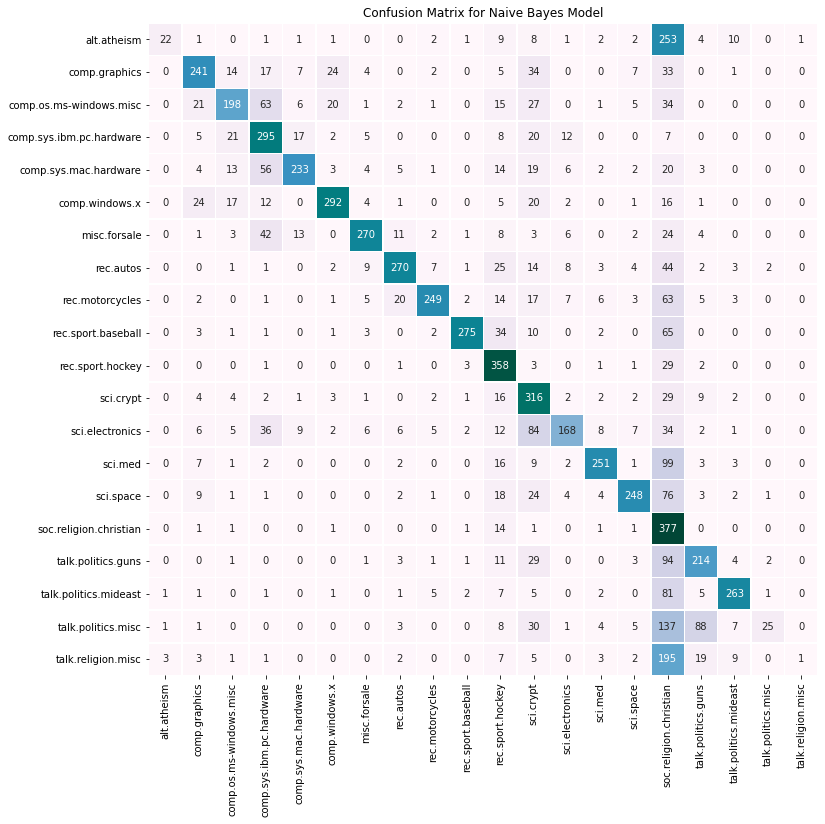

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 12))
names = newsgroups_test['target_names']

sns.heatmap(conf_matrix, annot=True, fmt ="d", linewidths = 0.5, 
            cbar = False, xticklabels=names, yticklabels=names, cmap ='PuBuGn')
plt.title('Confusion Matrix for Naive Bayes Model')

# plt.ylabel('Actual Labels')
# plt.xlabel('Predicted')
#     kept receiving error when trying to add labels

plt.show()

# Resources

Accuracy_score. (n.d.). Retrieved May 31, 2020, from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

Brownlee, J. (2019, October 17). Naive bayes classifier from scratch in python. Machine Learning Mastery. https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/

Built-in Functions . (n.d.). Retrieved June 1, 2020, from https://docs.python.org/3/library/functions.html#enumerate

Choosing Colormaps in Matplotlib. (n.d.). https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html

Classification_report. (n.d.). Retrieved May 31, 2020, from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

Confusion matrix. (2020). In Wikipedia. https://en.wikipedia.org/w/index.php?title=Confusion_matrix&oldid=954210836

Confusion_matrix. (n.d.). Retrieved May 31, 2020, from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

Dataset loading utilities . (n.d.). Retrieved June 1, 2020, from https://scikit-learn.org/stable/datasets/index.html#newsgroups-dataset

Feature_extraction. Text. Tfidfvectorizer. (n.d.). Retrieved May 31, 2020, from https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

How to sum columns of an array in Python. (n.d.). Stack Overflow. Retrieved May 31, 2020, from https://stackoverflow.com/questions/43459581/how-to-sum-columns-of-an-array-in-python

Kadam, S. (2018, May 11). Generating word cloud in python. GeeksforGeeks. https://www.geeksforgeeks.org/generating-word-cloud-python/

Koehrsen, W. (2018, March 10). Beyond accuracy: Precision and recall. Medium. https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c

Model_selection. Train_test_split. (n.d.). Retrieved May 31, 2020, from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Naive_bayes. Multinomialnb. (n.d.). Retrieved May 31, 2020, from https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

Nltk package. (n.d.). Retrieved May 16, 2020, from http://www.nltk.org/api/nltk.html?highlight=freqdist

Precision_score . (n.d.). Retrieved May 31, 2020, from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score

Recall_score. (n.d.). Retrieved May 31, 2020, from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score

Replace elements of a matrix using numpy in python. (2019, October 31). https://www.science-emergence.com/Articles/How-to-replace-some-elements-of-a-matrix-using-numpy-in-python-/

Rotate axis text in python matplotlib. (n.d.). Stack Overflow. Retrieved June 1, 2020, from https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib

Seaborn heatmap. (n.d.). Retrieved May 31, 2020, from https://seaborn.pydata.org/generated/seaborn.heatmap.html

Varun. (n.d.). Python: Find unique values in a numpy array with frequency & indices | numpy.unique() – thispointer.com. Retrieved June 1, 2020, from https://thispointer.com/python-find-unique-values-in-a-numpy-array-with-frequency-indices-numpy-unique/

Vu, D. (2019, November 8). Generate word clouds in python. DataCamp Community. https://www.datacamp.com/community/tutorials/wordcloud-python